# 다변수 연속확률변수

다변수 이산확률분포와는 달리 ...
- 단변수 연속확률변수처럼 누적확률분포함수(CDF) 먼저 정의
- 이를 미분하여 PDF 정의

### 다변수 연속확률변수의 Joint CDF

$$\text{CDF} = F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(\{X < x, Y < y\})$$

(특성)

$$ F_{XY}(\infty, \infty) = 1$$

하나라도 $-\infty$에 닿으면, 0

$$ F_{XY}(-\infty, y) = F_{XY}(x, -\infty) = 0$$


x, y 중 하나가 무한대 값을 가지는 변수에는 남은 하나의 변수는 어떤 값을 가져도 상관이 없다. 남은 하나의 변수에 대한 CDF도 drop.

(Marginal CDF)

$$F_X(x)=F_{XY}(x, \infty)$$

$$F_Y(y)=F_{XY}(\infty, y)$$

### 다변수 연속확률변수의 Joint PDF

(정의) Joint CDF를 미분하여 정의. 독립변수가 2개이므로 모두 편미분한다.

$$f_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y}$$

(확률) 특정 구간에 대해 적분

$$\int_{x_1}^{x_2} \int_{y_1}^{y_2} f_{XY}(x,y)dxdy = P\big(\{ x_1 \leq X \leq x_2, \; y_1 \leq Y \leq y_2 \}\big)$$

(+) $-\infty$ 부터 $+\infty$ 까지 적분하면 모든 확률, 1의 값

$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{XY}(x,y)dxdy=1$$

### 시뮬레이션 및 시각화

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

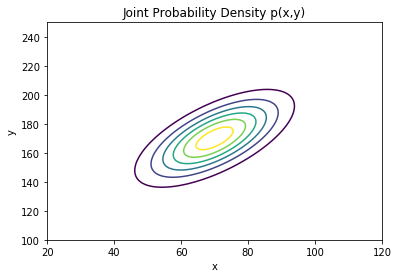

In [2]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density p(x,y)")
plt.show()

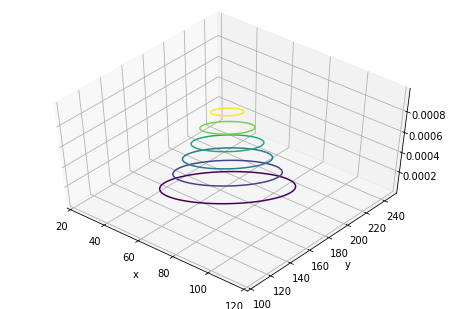

In [3]:
#3차원으로 구현

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.view_init(50, -50)
plt.show()

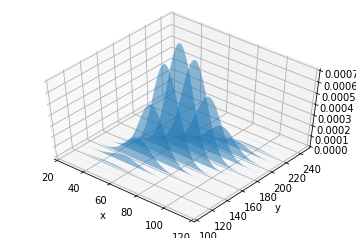

In [4]:
# 고정된 y값에 대한 PDF의 단면

from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.show()

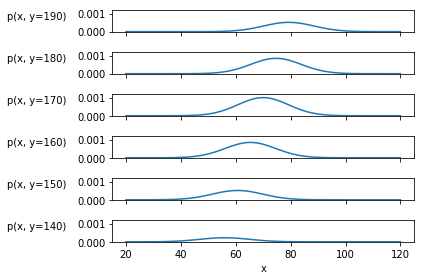

In [5]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.show()

연습문제 1.

1. 확률 변수의 값을 모른다고 할 때 어떤 값이 나올 가능성이 가장 높은가. 답: 70kg, 170cm
2. 만약 확률 변수 Y 의 값이 170이 나왔다면 확률 변수 X 의 값은 어떤 값이 나올 가능성이 가장 높은가. 답: 70kg
3. 만약 확률 변수 Y 의 값이 150이 나왔다면 확률 변수 X 의 값은 어떤 값이 나올 가능성이 가장 높은가. 답: 60kg

### 다변수 연속확률분포의 Marginal PDF

Joint PDF를 특정 변수 1개에 대해 가중평균한 값.  
하나의 확률변수에 대해서만 적분하여 구한다.


$$\nonumber  f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x,y)dy $$

$$\nonumber  f_Y(y) = \int_{-\infty}^{\infty} f_{XY}(x,y)dx$$


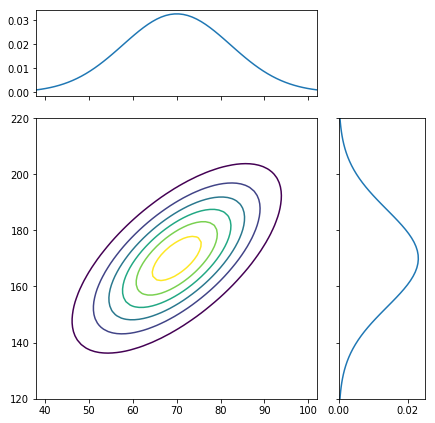

In [6]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax2.plot(xx, fx)
base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)
plt.show()

### 다변수 연속확률변수의 Conditional PDF

- 다변수 확률 변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우
- 위의 조건에 의해 변화한 나머지 확률 변수에 대한 PDF


(PDF)

$$f_{X \mid Y}(x \mid y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)}$$

$$f_{Y \mid X}(y \mid x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)}$$


조건으로 고정 되어 있는 확률변수 값은 모수로 생각할 수 있음.  
$f_X|Y(x|y)에서 y의 값은 고정되어 있으므로, 이 값은 x의 함수

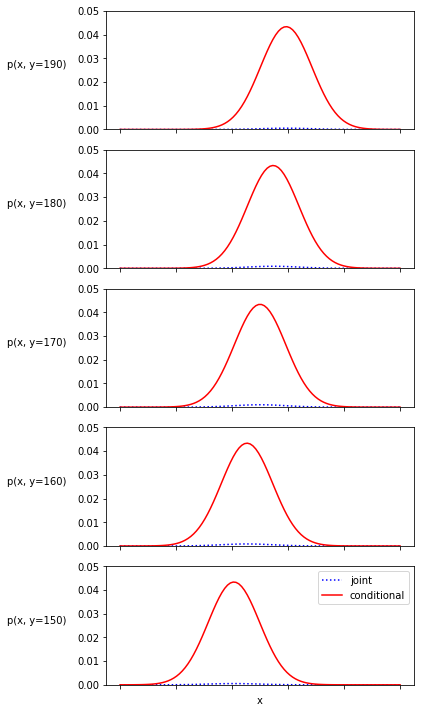

In [7]:
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.figure(figsize=(6,10))

for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :], 'b:', label="joint")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label="conditional")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()